In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt

#plt.style.use('seaborn')

# Previsão 12 meses da cesta básica e produtos

## Cesta Básica

### Carregar valores previstos da cesta básica

In [2]:
model = 'RNN'
ano_previsao = 2023

qtd_meses = 12
regioes = ['ilheus', 'itabuna']
resultados = {'ilheus': [], 'itabuna': []}

for regiao in regioes:
    with open(f'../resultados/previsoes_cesta/previsao_{model}_12_meses_cesta_basica_{regiao}.json','r') as file:
        resultado = json.load(file)
        resultado['cesta_basica'] = resultado['cesta_basica'].replace("[", "")
        resultado['cesta_basica'] = resultado['cesta_basica'].replace("]", "")
        temp = resultado['cesta_basica'].split(',')
        for valor in temp:
            resultados[regiao].append(float(valor) * 1000)

### Gerar gráfico da cesta básica de Ilhéus e Itabuna

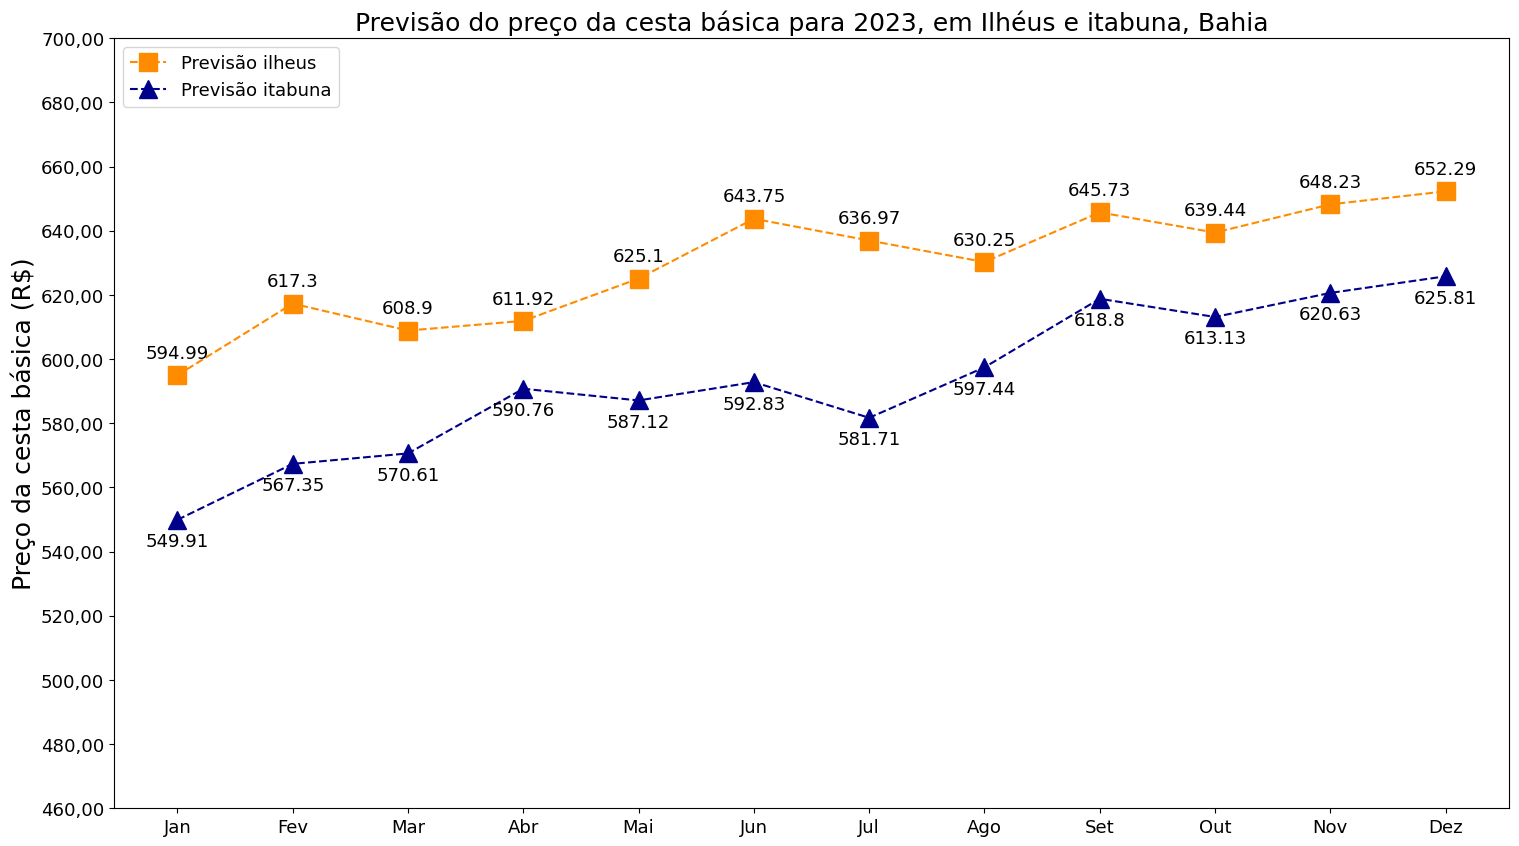

In [3]:
markers = ['s', '^']
colors_predict = ['darkorange', 'darkblue']
xticks_label = ['Jan', 'Fev', 'Mar','Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
yticks_label = ['460,00', '480,00', '500,00', '520,00', '540,00', '560,00', '580,00', '600,00', '620,00', 
                '640,00', '660,00', '680,00', '700,00']
x_values = [i for i in range(12)]

fig, ax = plt.subplots(1,1, figsize=(18, 10))

for regiao, marker, colorPredict in zip(regioes, markers, colors_predict):
    ax.plot(x_values, resultados[regiao], label = f'Previsão {regiao}', 
    color = colorPredict, marker = marker, ls ='--', markersize=13)

meses = [mes for mes in range(12)]

for regiao in regioes:
    for mes, valor in zip(meses, resultados[regiao]):
        indexValor = resultados[regiao].index(valor)

        if regiao == "ilheus":
            if valor >= resultados['itabuna'][indexValor]:
                ax.annotate(str(round(valor, 2)), xy=(mes, valor + 4), size=13, va='bottom', ha= 'center')
            else: 
                ax.annotate(str(round(valor, 2)), xy=(mes, valor - 4), size=13, va='top', ha= 'center')
        else:
            if valor >= resultados['ilheus'][indexValor]:
                ax.annotate(str(round(valor, 2)), xy=(mes, valor + 4), size=13, va='bottom', ha= 'center')
            else: 
                ax.annotate(str(round(valor, 2)), xy=(mes, valor - 4), size=13, va='top', ha= 'center')

ax.set_ylabel("Preço da cesta básica (R$)", size=18)
plt.xticks([x for x in range(0,12)], xticks_label, size=13)
plt.yticks(range(460, 720, 20), yticks_label, size=13)
plt.title(f"Previsão do preço da cesta básica para {ano_previsao}, em Ilhéus e itabuna, Bahia", size=18)
plt.legend(loc='upper left', fontsize=13)
plt.savefig(fname=f'../resultados/figuras/previsao_{model}_{qtd_meses}_meses_cesta_basica.png')

## Produtos da cesta básica

### Carregar valores previstos dos produtos

In [4]:
model = 'RNN'
ano_previsao = 2023

qtd_meses = 12
regioes = ['ilheus', 'itabuna']
produtos = ['acucar', 'arroz', 'banana', 'cafe', 'farinha', 'feijao', 'leite', 'manteiga', 'oleo', 'pao', 'carne', 'tomate']
quantidades = {'acucar':3.0, 'arroz':3.6, 'banana':7.5,  'cafe':0.3, 'carne':4.5, 'farinha':3.0, 'feijao':4.5, 'leite':6.0, 
               'manteiga':0.75, 'oleo':1.0, 'pao':6.0, 'tomate':12.0  }
resultados_ios = {}
resultados_itb = {}

for regiao in regioes:
    for produto in produtos:
        with open(f'../resultados/previsoes_produtos/{regiao}/previsao_{model}_12_meses_{produto}_{regiao}.json','r') as file:
            resultado = json.load(file)
            resultado[produto] = resultado[produto].replace("[", "")
            resultado[produto] = resultado[produto].replace("]", "")
            
            temp = resultado[produto].split(',')
            temp = list(map(float,temp))
            temp = [valor/quantidades[produto] * 1000 for valor in temp]
            
            for valor in temp:
                if regiao == 'ilheus':
                    if produto not in resultados_ios.keys():
                        resultados_ios[produto] = []
                        resultados_ios[produto].append(valor)
                    else:
                        resultados_ios[produto].append(valor)
                elif regiao == 'itabuna':
                    if produto not in resultados_itb.keys():
                        resultados_itb[produto] = []
                        resultados_itb[produto].append(valor)
                    else:
                        resultados_itb[produto].append(valor)

### Previsão dos produtos de Ilhéus

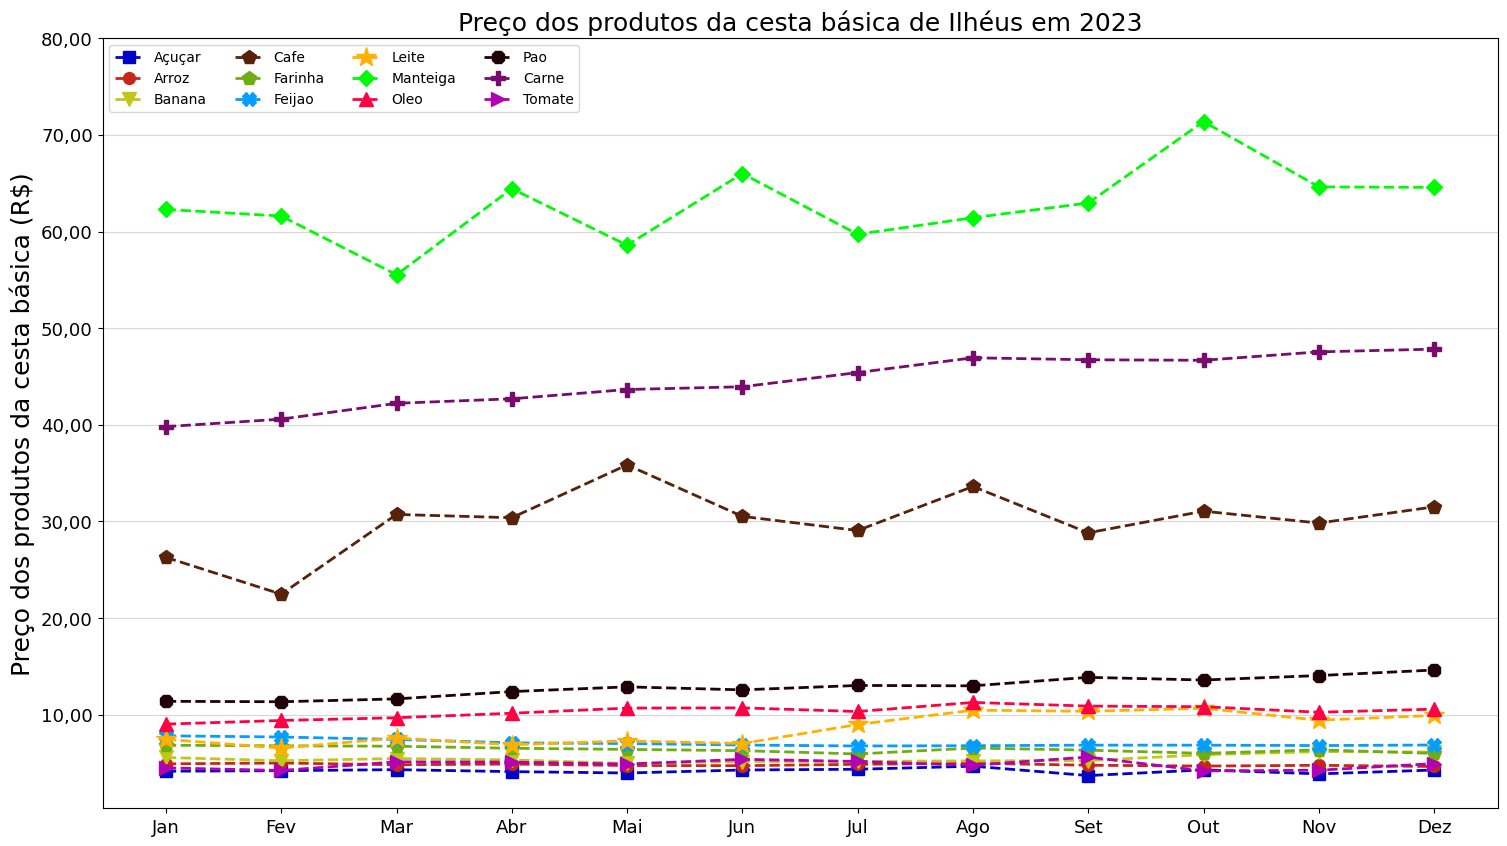

In [5]:
marks = ['s', '.', 'v', 'p', 'p', 'X', '*', 'D', '^', '8', 'P', '>']
xticks_label = ['Jan', 'Fev', 'Mar','Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
yticks_label = ['10,00', '20,00', '30,00', '40,00', '50,00', '60,00', '70,00', '80,00']
colors_predict = ['#0004c7', '#c9261a', '#c1c718', '#57210a', '#6fad11', '#039eff', '#ffb100', '#00fa08', '#ff0044', 
               '#210109', '#780c6d','#b200b5']

markers_size = [8, 17, 10, 10, 10, 10, 15, 8, 10, 10, 10, 10]
line_size = 2
x_values = [i for i in range(12)]

fig, ax = plt.subplots(1,1, figsize=(18, 10))

for produto, mark, color_predict, marker_size in zip(produtos, marks, colors_predict, markers_size):
    ax.plot(x_values, resultados_ios[produto], label = f"{produto.title().replace('c','ç')}", color = color_predict, 
            marker = mark, ls ='--', markersize=marker_size, lw=line_size)
    
plt.xticks([x for x in range(0,12)], xticks_label,size=13)
plt.yticks([x for x in range(10, 90, 10)], yticks_label,size=13)
plt.ylabel("Preço dos produtos da cesta básica (R$)",size=18)
plt.grid(which='major', axis='y', alpha=0.5)
plt.title(f"Preço dos produtos da cesta básica de Ilhéus em {ano_previsao}", size=18)
plt.legend(ncol=4, loc='upper left')
plt.savefig(fname=f'../resultados/figuras/produtos_ilheus/previsao_{model}_{qtd_meses}_meses_produtos_ilheus.png')
plt.show()

### Previsão dos produtos de Itabuna 

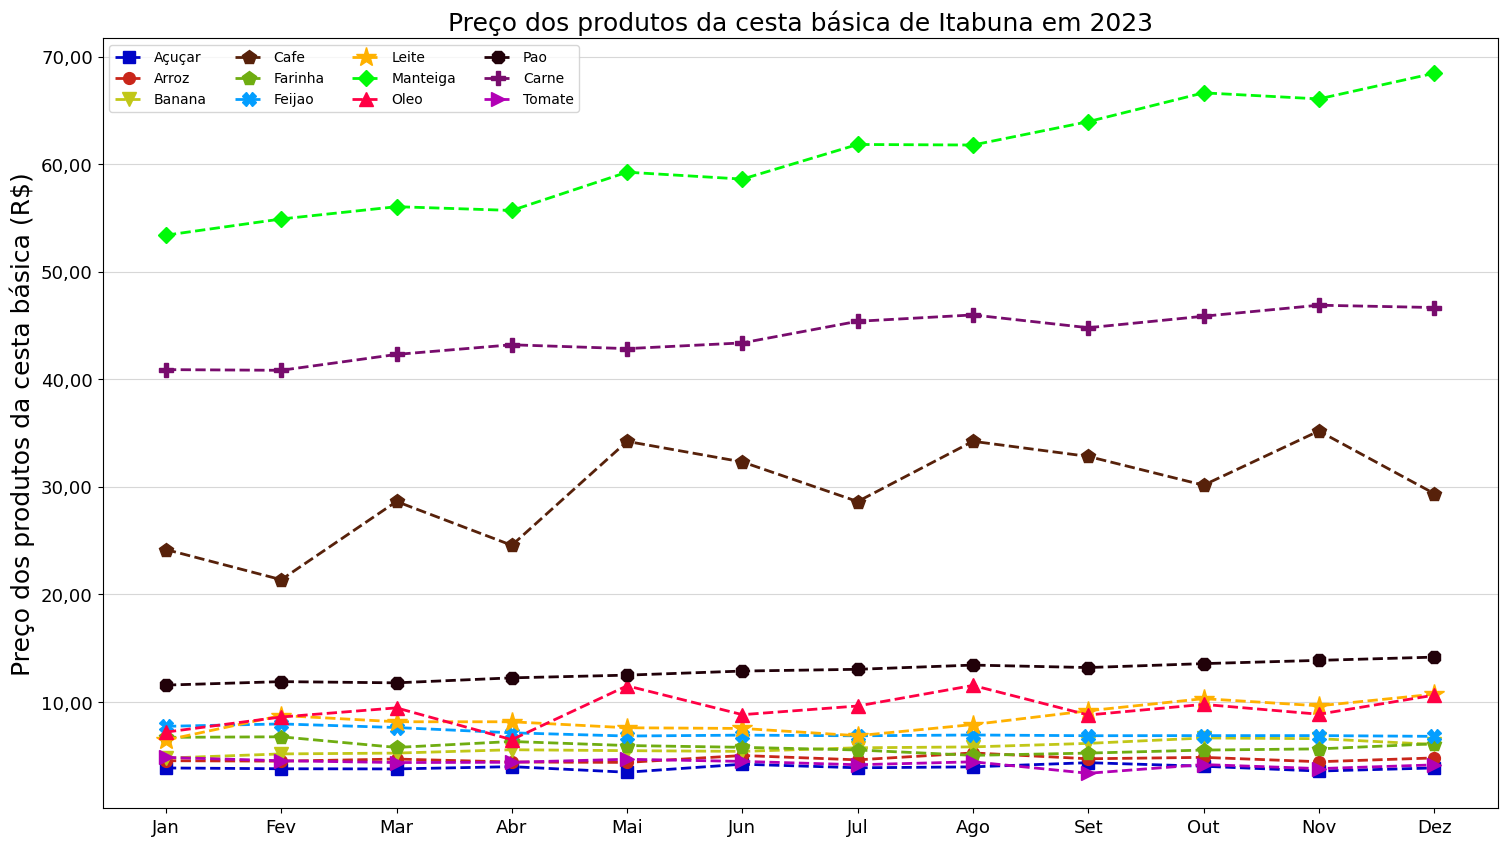

In [6]:
marks = ['s', '.', 'v', 'p', 'p', 'X', '*', 'D', '^', '8', 'P', '>']
xticks_label = ['Jan', 'Fev', 'Mar','Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
yticks_label = ['10,00', '20,00', '30,00', '40,00', '50,00', '60,00', '70,00']
colors_predict = ['#0004c7', '#c9261a', '#c1c718', '#57210a', '#6fad11', '#039eff', '#ffb100', '#00fa08', '#ff0044', 
               '#210109', '#780c6d','#b200b5']

markers_size = [8, 17, 10, 10, 10, 10, 15, 8, 10, 10, 10, 10]
line_size = 2
x_values = [i for i in range(12)]

fig, ax = plt.subplots(1,1, figsize=(18, 10))

for produto, mark, color_predict, marker_size in zip(produtos, marks, colors_predict, markers_size):
    ax.plot(x_values, resultados_itb[produto], label = f"{produto.title().replace('c','ç')}", color = color_predict, 
            marker = mark, ls ='--', markersize=marker_size, lw=line_size)
    
plt.xticks([x for x in range(0,12)], xticks_label,size=13)
plt.yticks([x for x in range(10, 80, 10)], yticks_label,size=13)
plt.ylabel("Preço dos produtos da cesta básica (R$)",size=18)
plt.grid(which='major', axis='y', alpha=0.5)
plt.title(f"Preço dos produtos da cesta básica de Itabuna em {ano_previsao}", size=18)
plt.legend(ncol=4, loc='upper left')
plt.savefig(fname=f'../resultados/figuras/produtos_itabuna/previsao_{model}_{qtd_meses}_meses_produtos_itabuna.png')
plt.show()